# Mass-SFR Relation
---------------------------------------

We want to understand how the dynamics of the clusters impact on the star formation rate. In particular, how the infall population changes over time. 

In [1]:
from file_loc import FileLocs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at

# Reading Initial Data

In [3]:
fl = FileLocs()
#galaxy_file = fl.gal_fname1
galaxy_file = '../data/groupCatalog_Yang_deCarvalho2017_galaxy_volumeLimited_v1'
cluster_file= fl.cls_fname

In [4]:
print('--------Initial Files-------')
print('Cluster File : %s'%cluster_file)
print('Galaxy File : %s'%galaxy_file)
print()

--------Initial Files-------
Cluster File : ../data/groupCatalog_Yang_deCarvalho2017.csv
Galaxy File : ../data/groupCatalog_Yang_deCarvalho2017_galaxy_volumeLimited_v1



In [8]:
# load catalogs
cat = at.read(cluster_file)
gal0= at.read(galaxy_file)

In [9]:
cat

Yang,RA,DEC,z,logM200,R200,N200
int64,float64,float64,float64,float64,float64,int64
2,240.5602,16.1113,0.036,15.29,2.01,525
4,247.1149,40.8317,0.03,14.66,1.24,217
5,247.1633,39.4674,0.03,14.81,1.4,277
6,167.6936,28.5374,0.033,14.6,1.18,167
7,351.1194,14.6251,0.042,14.51,1.1,106
8,239.5372,27.3133,0.09,15.1,1.71,183
9,241.5673,18.1483,0.038,14.48,1.08,143
10,223.2712,16.724,0.045,14.22,0.89,106
11,10.4693,-9.3997,0.056,14.96,1.55,156


In [10]:
gal0

Yang,objid,specobjid,distance,ra,dec,mu,mg,mr,mi,mz,mu_Err,mg_err,mr_err,mi_err,mz_err,photo_z,photo_zErr,z,zErr,fracDeV_i,bpt,mass,mass_p16,mass_p84,sfr,sfr_p16,sfr_p84,ssfr,ssfr_p16,ssfr_p84,mass_fire,mass_fire_p16,mass_fire_p84,age_fire,age_fire_p16,age_fire_p84,score,row,redshift,M200,R200,R,Rn,vlos,vlosn,infall,orbital,interloper,pinfall,porbital,pinterloper
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64
2,1237665530650231112,2841934444107950080,89.6269391362405,241.57843693246,14.9847540670112,20.4757,18.52523,17.54973,17.16701,16.80302,0.0887008,0.009577838,0.006253762,0.006521441,0.01432577,0.110193,0.010211,0.1231728,2.496678e-05,0.9789842,-1,10.69053,10.59839,10.78236,-1.318207,-2.62379,-0.4930567,-12.05,-13.37045,-11.22545,41403010000.0,32091820000.0,53817920000.0,4929381000.0,3280096000.0,6228817000.0,0.9118443,3,0.036,15.29,2.01,3.8500893881817264,1.9154673573043417,25225.62546596756,12.351819028216573,0,0,1,0.0,0.0,1.0
2,1237665530650231189,2841935543619577856,93.0302672496103,241.621146420941,14.9454652864579,19.19824,17.65663,16.8588,16.41705,16.06843,0.05880325,0.008172314,0.005978988,0.006268373,0.01489483,0.077475,0.024489,0.1269354,1.723609e-05,1.0,3,10.99481,10.89298,11.10171,0.6959944,0.2149101,1.181468,-10.34571,-10.85981,-9.835586,19509270000.0,18445930000.0,30142730000.0,3330074000.0,2980226000.0,5729034000.0,0.9118443,4,0.036,15.29,2.01,3.996285582987262,1.9882017825807274,26314.42768842973,12.88495498662984,0,0,1,0.0,0.0,1.0
2,1237665547827347728,2841891013398652928,66.9279962333088,240.988574304508,15.0749487080488,18.10222,16.55984,15.87389,15.51887,15.23896,0.03046442,0.00452454,0.003532456,0.003606966,0.00795144,0.046343,0.014991,0.03524532,1.029862e-05,0.5167674,1,10.31747,10.22748,10.41237,0.07491233,-0.09746825,0.2819673,-10.28968,-10.48632,-10.06143,6406905000.0,4934299000.0,7745638000.0,8277929000.0,6778579000.0,10976760000.0,0.8717796,5,0.036,15.29,2.01,2.875014705996323,1.430355575122549,-218.38549440486503,-0.10693324963996216,1,0,0,0.78,0.14,0.08
2,1237665566081483195,2838400888110868480,90.4464881468585,240.713424596535,14.6111162264233,17.71942,16.36608,15.73907,15.40933,15.13747,0.02493478,0.004048082,0.003419265,0.003449163,0.007783792,0.04369,0.012716,0.03736607,1.491802e-05,0.1406163,2,10.13713,10.05175,10.2355,-0.1388986,-0.4566603,0.1964595,-10.32625,-10.65404,-9.982267,2199423000.0,1791245000.0,4881733000.0,3430031000.0,2580399000.0,6528688000.0,0.9467953,7,0.036,15.29,2.01,3.885294617538927,1.9329823967855362,395.30645086878485,0.19356323784340831,1,0,0,0.87,0.0,0.13
2,1237665566081548631,2838401437866682368,88.2947352543135,240.840259513381,14.6647047042551,18.17223,17.28277,16.95842,16.75693,16.56413,0.02911397,0.006809405,0.006163856,0.006861015,0.01980359,0.029663,0.00699,0.03394401,6.543075e-06,0.2055249,1,9.132375,9.061535,9.235763,-0.3468749,-0.5563634,-0.05026153,-9.539729,-9.768909,-9.224825,759437600.0,478372300.0,1142708000.0,3829858000.0,2630377000.0,5828991000.0,0.9464893,8,0.036,15.29,2.01,3.7928621295234226,1.8869960843400115,-594.9520228990541,-0.2913204165040357,1,0,0,0.7,0.0,0.3
2,1237665566081548660,2841874795602143232,90.3938052012063,240.837811516697,14.6287064478069,17.86097,16.69389,16.15542,15.85376,15.613,0.02609082,0.004383252,0.003852633,0.00390262,0.008759319,0.0381,0.011709,0.03393892,1.614599e-05,0.1390262,-1,9.78013,9.696836,9.870125,-0.2374831,-0.4945844,0.0582342,-10.07336,-10.34707,-9.764594,28885860.0,28885860.0,233783900.0,31504160.0,31504160.0,731200800.0,0.9464893,9,0.036,15.29,2.01,3.883031525080918,1.9318564801397604,-596.4249414427027,-0.2920416364126955,1,0,1,0.58,0.03,0.39
2,12376655660815

# Mask Data
---------------------

In [11]:
mask = np.abs(gal0['vlosn'])<2.
mask&= gal0['ssfr']>-20

Nsize = np.count_nonzero(mask)

print('Masking Galaxies')
print('New Size: %i'%(Nsize))
print('fraction: %.2f'%(1.*Nsize/len(gal0)))

Masking Galaxies
New Size: 22045
fraction: 0.54


In [12]:
gal = gal0[mask].copy()

## Magnitude Limit
---------------------------------------

Definit the mass limit of the study

In [13]:
mass = 10**np.array(gal['mass'])
z    = np.array(gal['z'])

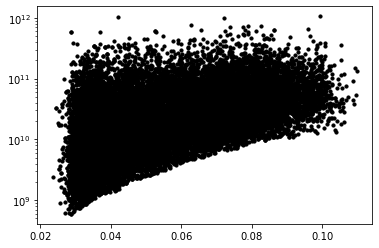

In [14]:
plt.scatter(z,mass,s=10,c='k')
plt.yscale('log')

# Phase Space Analysis
---------------------------------------


In [15]:
mass = np.array(gal['mass'])
sfr  = np.array(gal['sfr'])
Pi   = np.array(gal['pinfall'])
Po   = np.array(gal['porbital'])
Pn   = np.array(gal['pinterloper'])

In [16]:
ntotal = int(np.sum(Pi+Po+Pn))

In [17]:
ntotal

22045

In [18]:
np.sum(Pi)/ntotal

0.38238920390111136

In [19]:
np.sum(Po)/ntotal

0.3660485370832388

In [20]:
np.sum(Pn)/ntotal

0.2515622590156498

In [21]:
nsize = int(np.sum(Pi))
idx = np.random.choice(ntotal, nsize, p=Pi/np.sum(Pi), replace=False)
idx.size

8429

(array([ 246.,  595.,  868., 1106., 1277., 1318., 1251., 1004.,  618.,
         146.]),
 array([0.01 , 0.109, 0.208, 0.307, 0.406, 0.505, 0.604, 0.703, 0.802,
        0.901, 1.   ]),
 <BarContainer object of 10 artists>)

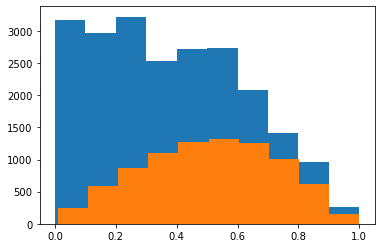

In [22]:
plt.hist(Pi)
plt.hist(Pi[idx])

In [23]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a were np.arange(a)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each

In [24]:
stellar_mass_label = r'Log($M_{\star}/M_{\odot}$) ' 
sfr_label = 'SFR'

In [25]:
import pandas as pd
import seaborn as sns

In [26]:
def get_kde(xy,weights=None):
    pdf = gaussian_kde(xy, weights=weights)
    pdf.set_bandwidth(bw_method=pdf.factor / 1.)  # kde bandwidth
    zz2 = pdf((np.ravel(xx), np.ravel(yy)))
    zz2 = np.reshape(zz2, xx.shape)
    return zz2

In [31]:
# grid
xmin, xmax = 9., 12.0
ymin, ymax = -2.5, 1.0
x = np.linspace(xmin, xmax, 100)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRmass(x1,x2,x3,xth=0.0,ax=None,title=None):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(stellar_mass_label,fontsize=16)
    ax.set_ylabel(sfr_label,fontsize=16)
    if title is not None:
        ax.set_title(title,fontsize=16)

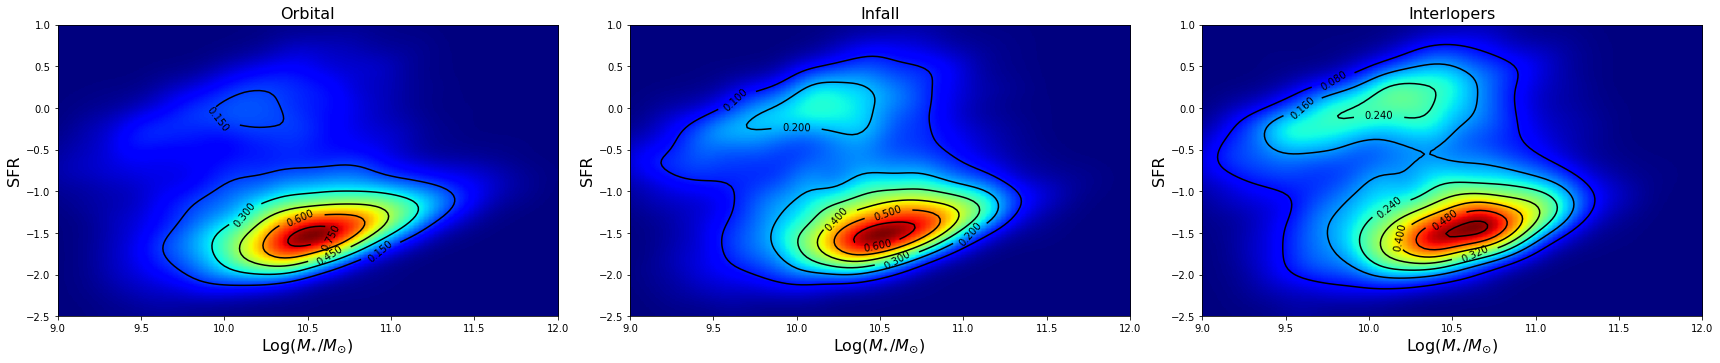

In [32]:
fig, axis = plt.subplots(1, 3, figsize=(24,8))
SFRmass(mass,sfr,Po,ax=axis[0],title='Orbital')
SFRmass(mass,sfr,Pi,ax=axis[1],title='Infall')
SFRmass(mass,sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_mass_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

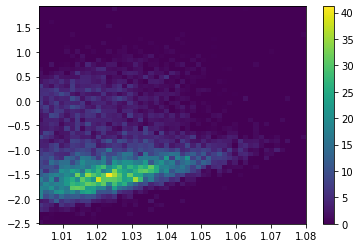

In [157]:
_ = plt.hist2d(np.log10(mass),sfr,weights=Po,bins=51,density=True)
plt.colorbar()

In [29]:
import numpy as np
import matplotlib.pyplot as plt


# class from here: http://nbviewer.ipython.org/gist/tillahoffmann/f844bce2ec264c1c8cb5
class gaussian_kde(object):
    """Representation of a kernel-density estimate using Gaussian kernels.
    Kernel density estimation is a way to estimate the probability density
    function (PDF) of a random variable in a non-parametric way.
    `gaussian_kde` works for both uni-variate and multi-variate data.   It
    includes automatic bandwidth determination.  The estimation works best for
    a unimodal distribution; bimodal or multi-modal distributions tend to be
    oversmoothed.
    Parameters
    ----------
    dataset : array_like
        Datapoints to estimate from. In case of univariate data this is a 1-D
        array, otherwise a 2-D array with shape (# of dims, # of data).
    bw_method : str, scalar or callable, optional
        The method used to calculate the estimator bandwidth.  This can be
        'scott', 'silverman', a scalar constant or a callable.  If a scalar,
        this will be used directly as `kde.factor`.  If a callable, it should
        take a `gaussian_kde` instance as only parameter and return a scalar.
        If None (default), 'scott' is used.  See Notes for more details.
    weights : array_like, shape (n, ), optional, default: None
        An array of weights, of the same shape as `x`.  Each value in `x`
        only contributes its associated weight towards the bin count
        (instead of 1).
    Attributes
    ----------
    dataset : ndarray
        The dataset with which `gaussian_kde` was initialized.
    d : int
        Number of dimensions.
    n : int
        Number of datapoints.
    neff : float
        Effective sample size using Kish's approximation.
    factor : float
        The bandwidth factor, obtained from `kde.covariance_factor`, with which
        the covariance matrix is multiplied.
    covariance : ndarray
        The covariance matrix of `dataset`, scaled by the calculated bandwidth
        (`kde.factor`).
    inv_cov : ndarray
        The inverse of `covariance`.
    Methods
    -------
    kde.evaluate(points) : ndarray
        Evaluate the estimated pdf on a provided set of points.
    kde(points) : ndarray
        Same as kde.evaluate(points)
    kde.pdf(points) : ndarray
        Alias for ``kde.evaluate(points)``.
    kde.set_bandwidth(bw_method='scott') : None
        Computes the bandwidth, i.e. the coefficient that multiplies the data
        covariance matrix to obtain the kernel covariance matrix.
        .. versionadded:: 0.11.0
    kde.covariance_factor : float
        Computes the coefficient (`kde.factor`) that multiplies the data
        covariance matrix to obtain the kernel covariance matrix.
        The default is `scotts_factor`.  A subclass can overwrite this method
        to provide a different method, or set it through a call to
        `kde.set_bandwidth`.
    Notes
    -----
    Bandwidth selection strongly influences the estimate obtained from the KDE
    (much more so than the actual shape of the kernel).  Bandwidth selection
    can be done by a "rule of thumb", by cross-validation, by "plug-in
    methods" or by other means; see [3]_, [4]_ for reviews.  `gaussian_kde`
    uses a rule of thumb, the default is Scott's Rule.
    Scott's Rule [1]_, implemented as `scotts_factor`, is::
        n**(-1./(d+4)),
    with ``n`` the number of data points and ``d`` the number of dimensions.
    Silverman's Rule [2]_, implemented as `silverman_factor`, is::
        (n * (d + 2) / 4.)**(-1. / (d + 4)).
    Good general descriptions of kernel density estimation can be found in [1]_
    and [2]_, the mathematics for this multi-dimensional implementation can be
    found in [1]_.
    References
    ----------
    .. [1] D.W. Scott, "Multivariate Density Estimation: Theory, Practice, and
           Visualization", John Wiley & Sons, New York, Chicester, 1992.
    .. [2] B.W. Silverman, "Density Estimation for Statistics and Data
           Analysis", Vol. 26, Monographs on Statistics and Applied Probability,
           Chapman and Hall, London, 1986.
    .. [3] B.A. Turlach, "Bandwidth Selection in Kernel Density Estimation: A
           Review", CORE and Institut de Statistique, Vol. 19, pp. 1-33, 1993.
    .. [4] D.M. Bashtannyk and R.J. Hyndman, "Bandwidth selection for kernel
           conditional density estimation", Computational Statistics & Data
           Analysis, Vol. 36, pp. 279-298, 2001.
    Examples
    --------
    Generate some random two-dimensional data:
    >>> from scipy import stats
    >>> def measure(n):
    >>>     "Measurement model, return two coupled measurements."
    >>>     m1 = np.random.normal(size=n)
    >>>     m2 = np.random.normal(scale=0.5, size=n)
    >>>     return m1+m2, m1-m2
    >>> m1, m2 = measure(2000)
    >>> xmin = m1.min()
    >>> xmax = m1.max()
    >>> ymin = m2.min()
    >>> ymax = m2.max()
    Perform a kernel density estimate on the data:
    >>> X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    >>> positions = np.vstack([X.ravel(), Y.ravel()])
    >>> values = np.vstack([m1, m2])
    >>> kernel = stats.gaussian_kde(values)
    >>> Z = np.reshape(kernel(positions).T, X.shape)
    Plot the results:
    >>> import matplotlib.pyplot as plt
    >>> fig = plt.figure()
    >>> ax = fig.add_subplot(111)
    >>> ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
    ...           extent=[xmin, xmax, ymin, ymax])
    >>> ax.plot(m1, m2, 'k.', markersize=2)
    >>> ax.set_xlim([xmin, xmax])
    >>> ax.set_ylim([ymin, ymax])
    >>> plt.show()
    """
    def __init__(self, dataset, bw_method=None, weights=None):
        self.dataset = np.atleast_2d(dataset)
        if not self.dataset.size > 1:
            raise ValueError("`dataset` input should have multiple elements.")
        self.d, self.n = self.dataset.shape

        if weights is not None:
            self.weights = weights / np.sum(weights)
        else:
            self.weights = np.ones(self.n) / self.n

        # Compute the effective sample size
        # http://surveyanalysis.org/wiki/Design_Effects_and_Effective_Sample_Size#Kish.27s_approximate_formula_for_computing_effective_sample_size
        self.neff = 1.0 / np.sum(self.weights ** 2)

        self.set_bandwidth(bw_method=bw_method)

    def evaluate(self, points):
        """Evaluate the estimated pdf on a set of points.
        Parameters
        ----------
        points : (# of dimensions, # of points)-array
            Alternatively, a (# of dimensions,) vector can be passed in and
            treated as a single point.
        Returns
        -------
        values : (# of points,)-array
            The values at each point.
        Raises
        ------
        ValueError : if the dimensionality of the input points is different than
                     the dimensionality of the KDE.
        """
        from scipy.spatial.distance import cdist

        points = np.atleast_2d(points)

        d, m = points.shape
        if d != self.d:
            if d == 1 and m == self.d:
                # points was passed in as a row vector
                points = np.reshape(points, (self.d, 1))
                m = 1
            else:
                msg = "points have dimension %s, dataset has dimension %s" % (d, self.d)
                raise ValueError(msg)

        # compute the normalised residuals
        chi2 = cdist(points.T, self.dataset.T, 'mahalanobis', VI=self.inv_cov) ** 2
        # compute the pdf
        result = np.sum(np.exp(-.5 * chi2) * self.weights, axis=1) / self._norm_factor

        return result

    __call__ = evaluate

    def scotts_factor(self):
        return np.power(self.neff, -1. / (self.d + 4))

    def silverman_factor(self):
        return np.power(self.neff * (self.d + 2.0) / 4.0, -1. / (self.d + 4))

    #  Default method to calculate bandwidth, can be overwritten by subclass
    covariance_factor = scotts_factor

    def set_bandwidth(self, bw_method=None):
        """Compute the estimator bandwidth with given method.
        The new bandwidth calculated after a call to `set_bandwidth` is used
        for subsequent evaluations of the estimated density.
        Parameters
        ----------
        bw_method : str, scalar or callable, optional
            The method used to calculate the estimator bandwidth.  This can be
            'scott', 'silverman', a scalar constant or a callable.  If a
            scalar, this will be used directly as `kde.factor`.  If a callable,
            it should take a `gaussian_kde` instance as only parameter and
            return a scalar.  If None (default), nothing happens; the current
            `kde.covariance_factor` method is kept.
        Notes
        -----
        .. versionadded:: 0.11
        Examples
        --------
        >>> x1 = np.array([-7, -5, 1, 4, 5.])
        >>> kde = stats.gaussian_kde(x1)
        >>> xs = np.linspace(-10, 10, num=50)
        >>> y1 = kde(xs)
        >>> kde.set_bandwidth(bw_method='silverman')
        >>> y2 = kde(xs)
        >>> kde.set_bandwidth(bw_method=kde.factor / 3.)
        >>> y3 = kde(xs)
        >>> fig = plt.figure()
        >>> ax = fig.add_subplot(111)
        >>> ax.plot(x1, np.ones(x1.shape) / (4. * x1.size), 'bo',
        ...         label='Data points (rescaled)')
        >>> ax.plot(xs, y1, label='Scott (default)')
        >>> ax.plot(xs, y2, label='Silverman')
        >>> ax.plot(xs, y3, label='Const (1/3 * Silverman)')
        >>> ax.legend()
        >>> plt.show()
        """
        from six import string_types
        if bw_method is None:
            pass
        elif bw_method == 'scott':
            self.covariance_factor = self.scotts_factor
        elif bw_method == 'silverman':
            self.covariance_factor = self.silverman_factor
        elif np.isscalar(bw_method) and not isinstance(bw_method, string_types):
            self._bw_method = 'use constant'
            self.covariance_factor = lambda: bw_method
        elif callable(bw_method):
            self._bw_method = bw_method
            self.covariance_factor = lambda: self._bw_method(self)
        else:
            msg = "`bw_method` should be 'scott', 'silverman', a scalar " \
                  "or a callable."
            raise ValueError(msg)

        self._compute_covariance()

    def _compute_covariance(self):
        """Computes the covariance matrix for each Gaussian kernel using
        covariance_factor().
        """
        self.factor = self.covariance_factor()
        # Cache covariance and inverse covariance of the data
        if not hasattr(self, '_data_inv_cov'):
            # Compute the mean and residuals
            _mean = np.sum(self.weights * self.dataset, axis=1)
            _residual = (self.dataset - _mean[:, None])
            # Compute the biased covariance
            self._data_covariance = np.atleast_2d(np.dot(_residual * self.weights, _residual.T))
            # Correct for bias (http://en.wikipedia.org/wiki/Weighted_arithmetic_mean#Weighted_sample_covariance)
            self._data_covariance /= (1 - np.sum(self.weights ** 2))
            self._data_inv_cov = np.linalg.inv(self._data_covariance)

        self.covariance = self._data_covariance * self.factor ** 2
        self.inv_cov = self._data_inv_cov / self.factor ** 2
        self._norm_factor = np.sqrt(np.linalg.det(2 * np.pi * self.covariance))  # * self.n